In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score ,accuracy_score

In [75]:
df = pd.read_csv("D:/122B1F034/Dataset/Housing.csv")

In [76]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [77]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [101]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [78]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [79]:
Y = df['price']
X = df[['area']]

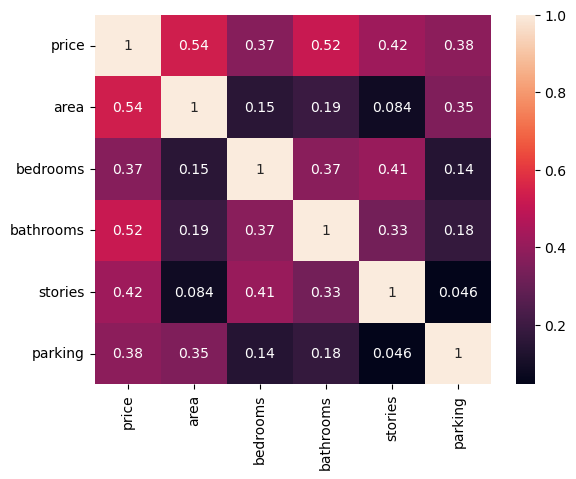

In [96]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr,annot=True)
plt.show()

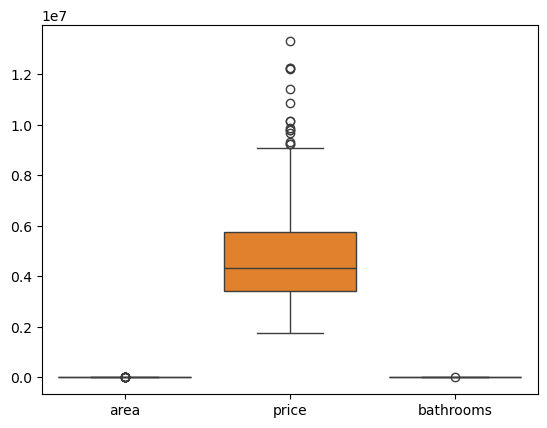

In [100]:
sns.boxplot(data=df[['area', 'price', 'bathrooms']])
plt.show()

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [81]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred = regressor.predict(X_test)

In [83]:
m = regressor.intercept_
c = regressor.coef_

In [84]:
print("Slope: ",m," Coefficient: ",c);


Slope:  2329244.913495152  Coefficient:  [475.26784571]


In [85]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 1997672371756.09
Root Mean Squared Error (RMSE): 1413390.38
Mean Absolute Error (MAE): 1026553.77
R² Score: 0.31


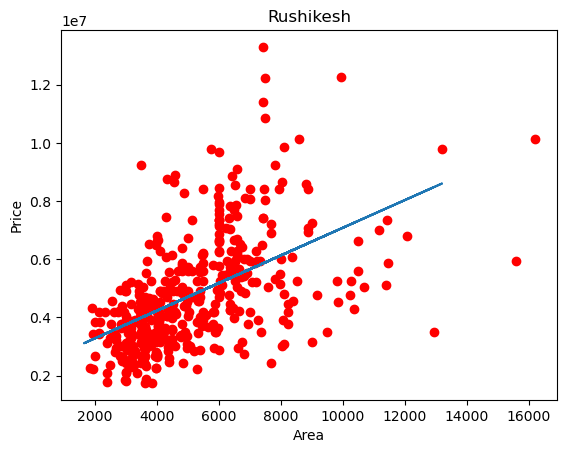

In [86]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_test,regressor.predict(X_test))
plt.title("Rushikesh")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

Gradient Descent

In [87]:
y = df['price']
x = df['area']
x,y

(0      7420
 1      8960
 2      9960
 3      7500
 4      7420
        ... 
 540    3000
 541    2400
 542    3620
 543    2910
 544    3850
 Name: area, Length: 545, dtype: int64,
 0      13300000
 1      12250000
 2      12250000
 3      12215000
 4      11410000
          ...   
 540     1820000
 541     1767150
 542     1750000
 543     1750000
 544     1750000
 Name: price, Length: 545, dtype: int64)

In [88]:
m=0
c=0

L=0.00000001
epochs = 10000

n = float(len(x))

for i in range(epochs):
    Y_pred = m*x + c
    D_m = (-2/n)*sum(x*(y-Y_pred))
    D_c = (-2/n)*sum(y-Y_pred)
    m = m - L*D_m
    c = c - L*D_c

        
print(m,c)

855.6980749397451 72.01200761856913


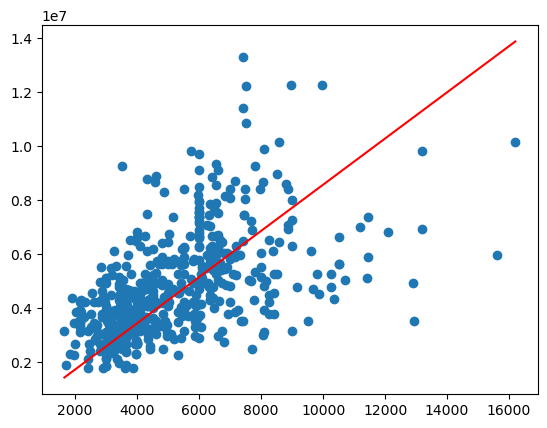

In [89]:
y_pred = x*m+c
plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(y_pred),max(y_pred)],color='red');
plt.show()

In [90]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 3346712397216.92
Root Mean Squared Error (RMSE): 1829402.20
Mean Absolute Error (MAE): 1355332.46
R² Score: 0.04
